In [ ]:
!pip install requests beautifulsoup4 pandas textblob wordcloud matplotlib scikit-learn nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Create a folder named "data" in your Google Drive if it doesn't exist
!mkdir -p /content/drive/MyDrive/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import os

# Base URL for Skytrax reviews
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 150  # Number of pages to scrape
data = []

# Loop through pages and scrape reviews
for page in range(1, pages + 1):
    url = f"{base_url}/page/{page}/"
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to scrape page {page}. Status code: {response.status_code}")
        break

    soup = BeautifulSoup(response.content, "html.parser")

    # Find review elements
    for review in soup.find_all("article", itemprop="review"):
        review_data = {}

        # Scrape review text
        review_text = review.find("div", class_="text_content")
        review_data["Review"] = review_text.get_text(strip=True) if review_text else None

        # Scrape review rating
        rating = review.find("span", itemprop="ratingValue")
        review_data["Rating"] = rating.get_text(strip=True) if rating else None

        # Scrape trip verification status
        verification = review.find("em", class_="text-muted")
        review_data["Verified"] = "Verified" if verification and "Verified" in verification.get_text(strip=True) else "Not Verified"

        # Scrape review date
        date = review.find("time", itemprop="datePublished")
        review_data["Date"] = date.get_text(strip=True) if date else None

        # Scrape traveler type and route (if available)
        metadata = review.find("td", class_="review-rating-header")
        if metadata:
            for row in review.find_all("tr"):
                header = row.find("td", class_="review-rating-header")
                if header:
                    key = header.get_text(strip=True).replace(" ", "_")
                    value = row.find("td", class_="review-value")
                    review_data[key] = value.get_text(strip=True) if value else None

        data.append(review_data)

    print(f"Scraped page {page} with {len(data)} reviews collected so far.")

    # Add a delay to avoid overwhelming the server
    time.sleep(2)  # 2-second delay between requests

    os.makedirs("data", exist_ok=True)

# Save reviews to a DataFrame
df = pd.DataFrame(data)
df.to_csv("data/british_airways_reviews_extended.csv", index=False)
print(f"Data saved to 'data/british_airways_reviews_extended.csv'. Total reviews: {len(df)}")

Scraped page 1 with 10 reviews collected so far.
Scraped page 2 with 20 reviews collected so far.
Scraped page 3 with 30 reviews collected so far.
Scraped page 4 with 40 reviews collected so far.
Scraped page 5 with 50 reviews collected so far.
Scraped page 6 with 60 reviews collected so far.
Scraped page 7 with 70 reviews collected so far.
Scraped page 8 with 80 reviews collected so far.
Scraped page 9 with 90 reviews collected so far.
Scraped page 10 with 100 reviews collected so far.
Scraped page 11 with 110 reviews collected so far.
Scraped page 12 with 120 reviews collected so far.
Scraped page 13 with 130 reviews collected so far.
Scraped page 14 with 140 reviews collected so far.
Scraped page 15 with 150 reviews collected so far.
Scraped page 16 with 160 reviews collected so far.
Scraped page 17 with 170 reviews collected so far.
Scraped page 18 with 180 reviews collected so far.
Scraped page 19 with 190 reviews collected so far.
Scraped page 20 with 200 reviews collected so far

In [ ]:
path = "/content/data/british_airways_reviews_extended.csv"
df1 = pd.read_csv(path)
df1.head()

,Review,Rating,Verified,Date,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Food_&_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money,Recommended,Wifi_&_Connectivity
0,✅Trip Verified| London Heathrow to Male In n...,9,Not Verified,1st February 2025,Boeing 777,Couple Leisure,Business Class,London to Male,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
1,Not Verified| Very good flight following an e...,9,Not Verified,20th January 2025,A320,Solo Leisure,Business Class,London Heathrow to Zurich,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
2,Not Verified| An hour's delay due to late arr...,7,Not Verified,19th January 2025,A319,Family Leisure,Economy Class,London to Lisbon,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
3,✅Trip Verified| I booked through BA because ...,1,Not Verified,15th January 2025,NaN,Solo Leisure,Economy Class,Manchester to Isle of Man,November 2024,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
4,✅Trip Verified| British airways lost bags in...,1,Not Verified,9th January 2025,NaN,Family Leisure,Premium Economy,Houston to cologne via London,December 2024,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


In [ ]:
df1.describe()

,Rating,Seat_Comfort,Cabin_Staff_Service,Food_&_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money,Wifi_&_Connectivity
count,1500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.114667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.232205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Review                  1500 non-null   object 
 1   Rating                  1500 non-null   int64  
 2   Verified                1500 non-null   object 
 3   Date                    1500 non-null   object 
 4   Aircraft                850 non-null    object 
 5   Type_Of_Traveller       1498 non-null   object 
 6   Seat_Type               1500 non-null   object 
 7   Route                   1496 non-null   object 
 8   Date_Flown              1500 non-null   object 
 9   Seat_Comfort            0 non-null      float64
 10  Cabin_Staff_Service     0 non-null      float64
 11  Food_&_Beverages        0 non-null      float64
 12  Inflight_Entertainment  0 non-null      float64
 13  Ground_Service          0 non-null      float64
 14  Value_For_Money         0 non-null      

In [ ]:
df1.isnull().sum()

,0
Review,0
Rating,0
Verified,0
Date,0
Aircraft,650
Type_Of_Traveller,2
Seat_Type,0
Route,4
Date_Flown,0
Seat_Comfort,1500


In [ ]:
df1.isnull().sum()

,0
Review,0
Rating,0
Verified,0
Date,0
Aircraft,650
Type_Of_Traveller,2
Seat_Type,0
Route,4
Date_Flown,0
Seat_Comfort,1500


since the missing values of the air craft is less than 50%, we can use model-based prediction to predict the type of aircraft it will be based on other factors that we have.

In [ ]:
missing_percentage = df1['Aircraft'].isnull().mean() * 100
print(f"Missing percentage in 'Aircraft': {missing_percentage}%")

Missing percentage in 'Aircraft': 43.333333333333336%


In [ ]:
most_common_aircraft = df1['Aircraft'].mode()[0]
df1['Aircraft'] = df1['Aircraft'].fillna(most_common_aircraft)

In [ ]:
df1.isnull().sum()

,0
Review,0
Rating,0
Verified,0
Date,0
Aircraft,0
Type_Of_Traveller,2
Seat_Type,0
Route,4
Date_Flown,0
Seat_Comfort,1500


In [ ]:
#since that has been dropped, we still have the aircraft data missing, atleast some of them. so lets us replace with the mode
df1 = df1.fillna(df1['Aircraft'].mode()[0])


In [ ]:
df1.isnull().sum()

,0
Review,0
Rating,0
Verified,0
Date,0
Aircraft,0
Type_Of_Traveller,2
Seat_Type,0
Route,4
Date_Flown,0
Seat_Comfort,1500


In [ ]:
df1 = pd.read_csv("/content/data/british_airways_reviews_extended.csv")

In [ ]:
df1.head()

,Review,Rating,Verified,Date,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Food_&_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money,Recommended,Wifi_&_Connectivity
0,✅Trip Verified| London Heathrow to Male In n...,9,Not Verified,1st February 2025,Boeing 777,Couple Leisure,Business Class,London to Male,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
1,Not Verified| Very good flight following an e...,9,Not Verified,20th January 2025,A320,Solo Leisure,Business Class,London Heathrow to Zurich,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
2,Not Verified| An hour's delay due to late arr...,7,Not Verified,19th January 2025,A319,Family Leisure,Economy Class,London to Lisbon,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
3,✅Trip Verified| I booked through BA because ...,1,Not Verified,15th January 2025,NaN,Solo Leisure,Economy Class,Manchester to Isle of Man,November 2024,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
4,✅Trip Verified| British airways lost bags in...,1,Not Verified,9th January 2025,NaN,Family Leisure,Premium Economy,Houston to cologne via London,December 2024,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


In [ ]:
print(df1["Date"].head(10))

0     1st February 2025
1     20th January 2025
2     19th January 2025
3     15th January 2025
4      9th January 2025
5      5th January 2025
6      4th January 2025
7      3rd January 2025
8      1st January 2025
9    17th December 2024
Name: Date, dtype: object


In [ ]:
df1["Date"] = df1["Date"].str.replace(r"(\d+)(st|nd|rd|th)", r"\1", regex=True)  # Removes "th", "st", etc.

In [ ]:
df1["Date"] = df1["Date"].str.extract(r"(\d{1,2} \w+ \d{4})")  # Extracts "12 January 2023"

In [ ]:
df1["Date"] = pd.to_datetime(df1["Date"], infer_datetime_format=True, errors="coerce")

<ipython-input-20-415e90fdda93>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df1["Date"] = pd.to_datetime(df1["Date"], infer_datetime_format=True, errors="coerce")


In [ ]:
df1.head()

,Review,Rating,Verified,Date,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Food_&_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money,Recommended,Wifi_&_Connectivity
0,✅Trip Verified| London Heathrow to Male In n...,9,Not Verified,2025-02-01,Boeing 777,Couple Leisure,Business Class,London to Male,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
1,Not Verified| Very good flight following an e...,9,Not Verified,2025-01-20,A320,Solo Leisure,Business Class,London Heathrow to Zurich,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
2,Not Verified| An hour's delay due to late arr...,7,Not Verified,2025-01-19,A319,Family Leisure,Economy Class,London to Lisbon,January 2025,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
3,✅Trip Verified| I booked through BA because ...,1,Not Verified,2025-01-15,A320,Solo Leisure,Economy Class,Manchester to Isle of Man,November 2024,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
4,✅Trip Verified| British airways lost bags in...,1,Not Verified,2025-01-09,A320,Family Leisure,Premium Economy,Houston to cologne via London,December 2024,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


In [ ]:
df1.isnull().sum()

,0
Review,0
Rating,0
Verified,0
Date,0
Aircraft,0
Type_Of_Traveller,2
Seat_Type,0
Route,4
Date_Flown,0
Seat_Comfort,1500


In [ ]:
df1 = df1.drop(['Seat_Comfort', 'Cabin_Staff_Service', 'Food_&_Beverages', 'Inflight_Entertainment', 'Ground_Service', 'Value_For_Money', 'Wifi_&_Connectivity'], axis=1)

In [ ]:
df1.head()

,Review,Rating,Verified,Date,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Recommended
0,✅Trip Verified| London Heathrow to Male In n...,9,Not Verified,2025-02-01,Boeing 777,Couple Leisure,Business Class,London to Male,January 2025,yes
1,Not Verified| Very good flight following an e...,9,Not Verified,2025-01-20,A320,Solo Leisure,Business Class,London Heathrow to Zurich,January 2025,yes
2,Not Verified| An hour's delay due to late arr...,7,Not Verified,2025-01-19,A319,Family Leisure,Economy Class,London to Lisbon,January 2025,yes
3,✅Trip Verified| I booked through BA because ...,1,Not Verified,2025-01-15,A320,Solo Leisure,Economy Class,Manchester to Isle of Man,November 2024,no
4,✅Trip Verified| British airways lost bags in...,1,Not Verified,2025-01-09,A320,Family Leisure,Premium Economy,Houston to cologne via London,December 2024,no


In [ ]:
df1 = df1.dropna(subset=["Review"])

In [ ]:

df1["Review"] = df1["Review"].str.replace("Not Verified|", "")
df1["Review"] = df1["Review"].str.strip()

In [ ]:
df1["Review"] = df1["Review"].str.replace(r"\s+", " ", regex=True)

In [ ]:
df1["Review"] = df1["Review"].str.replace("✅Trip Verified|","")

In [ ]:
df1.head()

,Review,Rating,Verified,Date,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Recommended
0,London Heathrow to Male In new business class...,9,Not Verified,2025-02-01,Boeing 777,Couple Leisure,Business Class,London to Male,January 2025,yes
1,Very good flight following an equally good fli...,9,Not Verified,2025-01-20,A320,Solo Leisure,Business Class,London Heathrow to Zurich,January 2025,yes
2,An hour's delay due to late arrival of the inc...,7,Not Verified,2025-01-19,A319,Family Leisure,Economy Class,London to Lisbon,January 2025,yes
3,I booked through BA because Loganair don’t ha...,1,Not Verified,2025-01-15,A320,Solo Leisure,Economy Class,Manchester to Isle of Man,November 2024,no
4,British airways lost bags in LHR then found t...,1,Not Verified,2025-01-09,A320,Family Leisure,Premium Economy,Houston to cologne via London,December 2024,no


In [ ]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

In [ ]:
df1.to_csv("British_airways_reviews_cleaned.csv", index=False)

In [ ]:
df = pd.read_csv("British_airways_reviews_cleaned.csv")
df.head(30)

,Review,Rating,Verified,Date,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Recommended
0,London Heathrow to Male In new business class...,9,Not Verified,2025-02-01,Boeing 777,Couple Leisure,Business Class,London to Male,January 2025,yes
1,Very good flight following an equally good fli...,9,Not Verified,2025-01-20,A320,Solo Leisure,Business Class,London Heathrow to Zurich,January 2025,yes
2,An hour's delay due to late arrival of the inc...,7,Not Verified,2025-01-19,A319,Family Leisure,Economy Class,London to Lisbon,January 2025,yes
3,I booked through BA because Loganair don’t ha...,1,Not Verified,2025-01-15,A320,Solo Leisure,Economy Class,Manchester to Isle of Man,November 2024,no
4,British airways lost bags in LHR then found t...,1,Not Verified,2025-01-09,A320,Family Leisure,Premium Economy,Houston to cologne via London,December 2024,no
5,The check in process and reward/loyalty progr...,1,Not Verified,2025-01-05,A320,Business,Economy Class,London to Basel,January 2025,no
6,"We flew in November 2023, but it took this lo...",1,Not Verified,2025-01-04,A320,Family Leisure,Economy Class,London to Phoenix,November 2023,no
7,I left for London from Johannesburg at 21:15 ...,1,Not Verified,2025-01-03,A320,Family Leisure,Economy Class,London to Johannesburg,January 2025,no
8,After an excellent flight on a 777 CPT to LHR...,5,Not Verified,2025-01-01,A380,Solo Leisure,Business Class,London to Cape Town via Johannesburg,December 2024,yes
9,On a recent flight from Cyprus BA621 on 23/11...,1,Not Verified,2024-12-17,A320,Family Leisure,Economy Class,Larnaca to Glasgow via Heathrow,November 2024,no


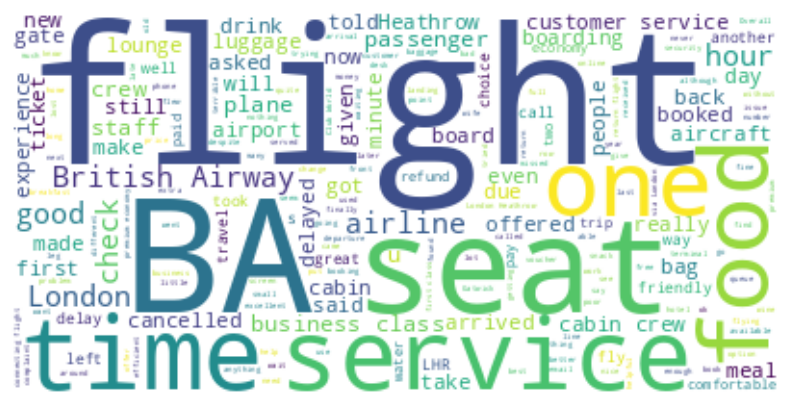

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
text = " ".join(review for review in df["Review"])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

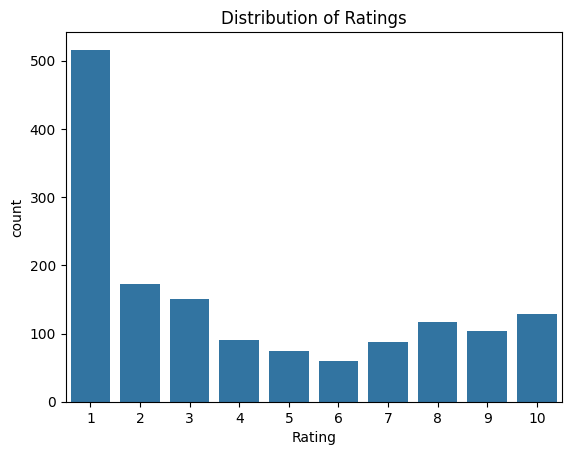

In [ ]:
import seaborn as sns

# Plot rating distribution
sns.countplot(x="Rating", data=df)
plt.title("Distribution of Ratings")
plt.show()

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
df["Sentiment"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, neutral, or negative
df["Sentiment_Label"] = df["Sentiment"].apply(
    lambda x: "Positive" if x > 0 else ("Neutral" if x == 0 else "Negative")
)

# Save results
df.to_csv("data/british_airways_reviews_with_sentiment.csv", index=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
tf = vectorizer.fit_transform(df["Review"])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tf)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 0:
['cancelled', 'service', 'customer', 'london', 'told', 'hours', 'airways', 'british', 'ba', 'flight']
Topic 1:
['seats', 'british', 'airways', 'london', 'airline', 'customer', 'staff', 'service', 'flight', 'ba']
Topic 2:
['journey', 'airline', 'time', 'water', 'flight', 'crew', 'service', 'airways', 'british', 'london']
Topic 3:
['passengers', 'cabin', 'plane', 'crew', 'staff', 'check', 'time', 'luggage', 'ba', 'flight']
Topic 4:
['cabin', 'business', 'good', 'crew', 'class', 'service', 'food', 'seat', 'ba', 'flight']


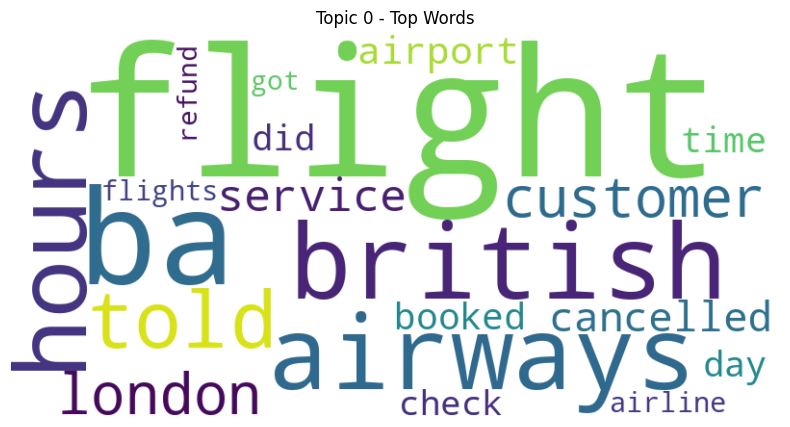

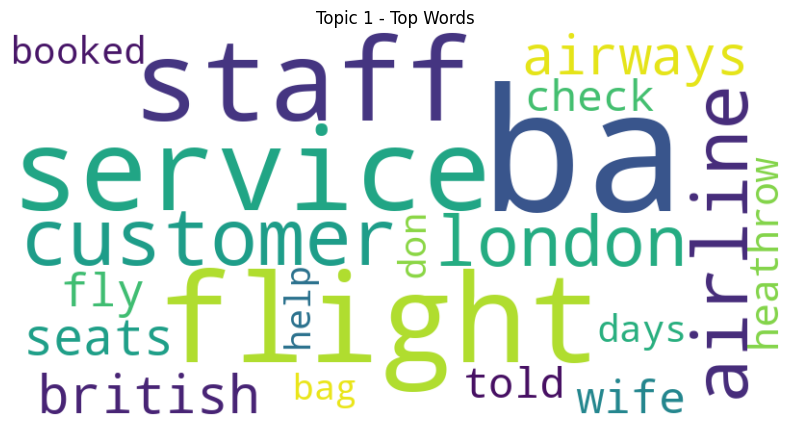

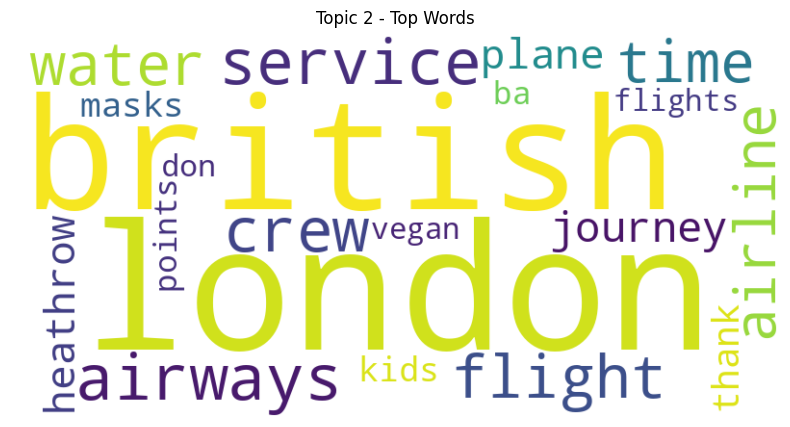

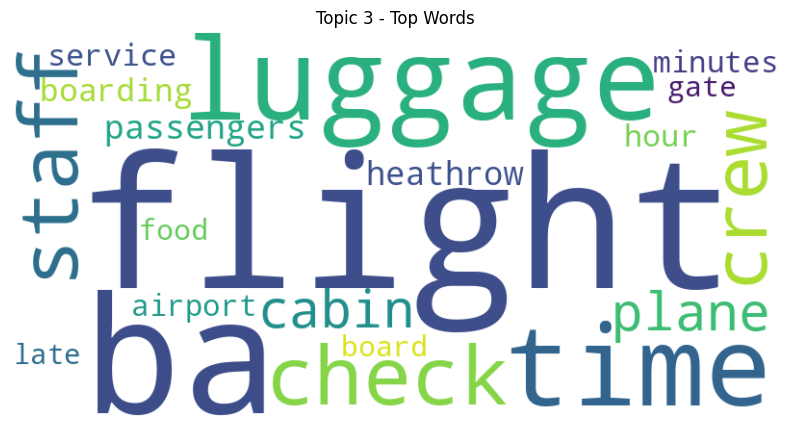

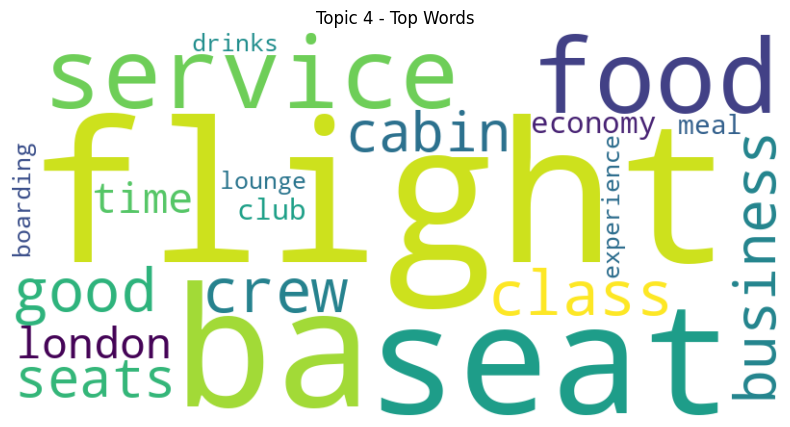

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word clouds for each topic
def generate_word_clouds(lda, vectorizer, n_topics):
    for idx, topic in enumerate(lda.components_):
        # Get the top 20 words for the topic
        top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]]
        top_words_freq = {word: topic[i] for word, i in zip(top_words, topic.argsort()[-20:])}

        # Generate word cloud
        wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(top_words_freq)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Topic {idx} - Top Words")
        plt.show()

# Generate word clouds for all topics
generate_word_clouds(lda, vectorizer, n_topics=5)

ERROR: Could not find a version that satisfies the requirement python-pptximport (from versions: none)
ERROR: No matching distribution found for python-pptximport


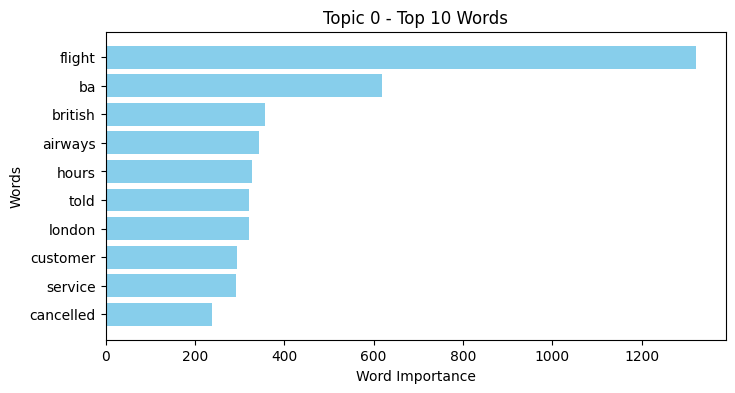

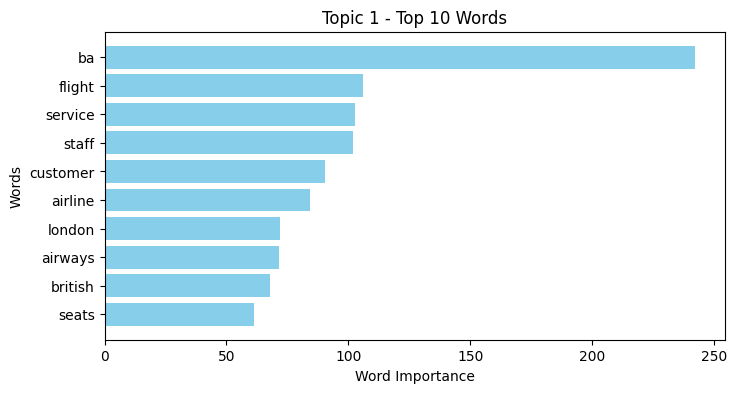

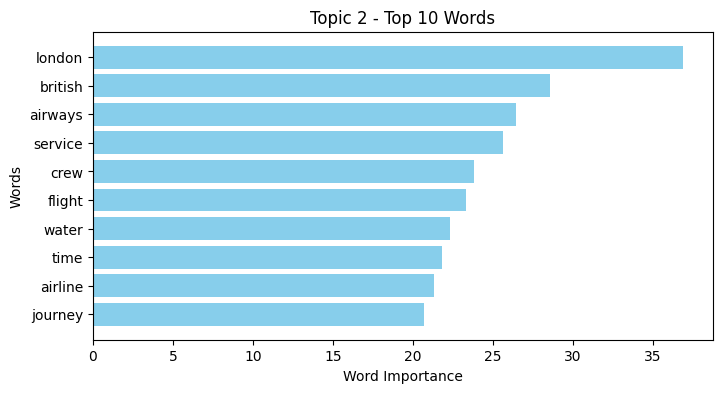

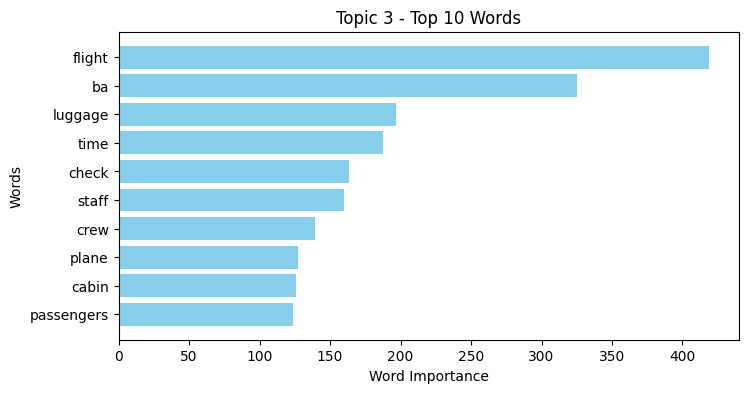

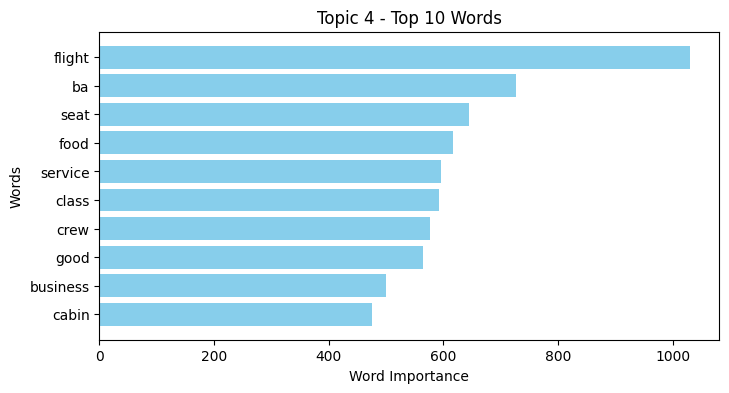

In [ ]:
!pip install python-pptximport numpy as np

# Function to plot bar charts for each topic
def plot_topic_barcharts(lda, vectorizer, n_topics, n_words=10):
    for idx, topic in enumerate(lda.components_):
        # Get the top n_words for the topic
        top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
        top_words_freq = topic[topic.argsort()[-n_words:]]

        # Plot the bar chart
        plt.figure(figsize=(8, 4))
        plt.barh(top_words, top_words_freq, color="skyblue")
        plt.title(f"Topic {idx} - Top {n_words} Words")
        plt.xlabel("Word Importance")
        plt.ylabel("Words")
        plt.show()

# Plot bar charts for all topics
plot_topic_barcharts(lda, vectorizer, n_topics=5, n_words=10)

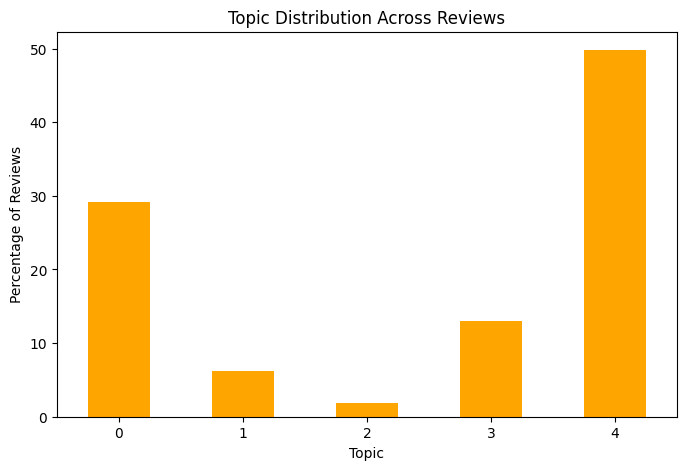

In [ ]:
# Assign each review to its dominant topic
topic_results = lda.transform(tf)
df["Dominant_Topic"] = topic_results.argmax(axis=1)

# Calculate the percentage of reviews per topic
topic_distribution = df["Dominant_Topic"].value_counts(normalize=True) * 100

# Plot the topic distribution
plt.figure(figsize=(8, 5))
topic_distribution.sort_index().plot(kind="bar", color="orange")
plt.title("Topic Distribution Across Reviews")
plt.xlabel("Topic")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


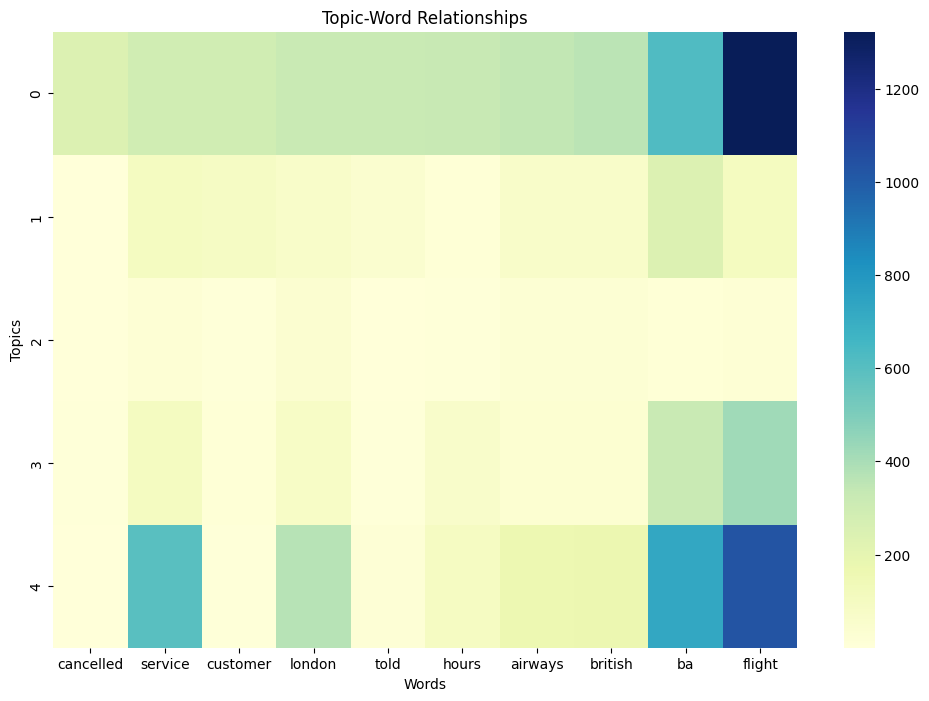

In [ ]:
import seaborn as sns

# Get the top 10 words for each topic
top_words_per_topic = []
for idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    top_words_per_topic.append(top_words)

# Create a DataFrame for the heatmap
import pandas as pd
heatmap_data = pd.DataFrame(lda.components_, columns=vectorizer.get_feature_names_out())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.loc[:, top_words_per_topic[0]], cmap="YlGnBu")
plt.title("Topic-Word Relationships")
plt.xlabel("Words")
plt.ylabel("Topics")
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


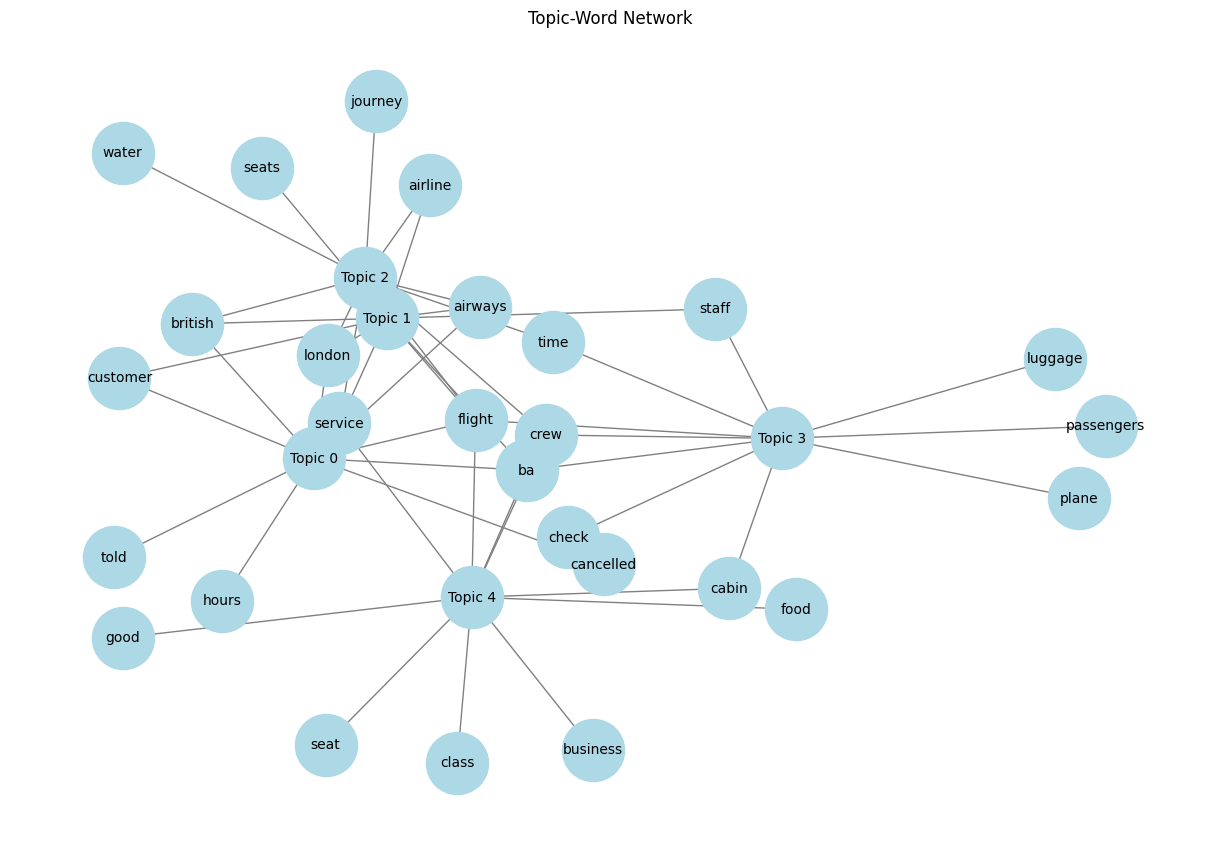

In [ ]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes and edges for each topic
for idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    for word in top_words:
        G.add_node(word)
        G.add_edge(f"Topic {idx}", word)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", font_size=10, node_size=2000)
plt.title("Topic-Word Network")
plt.show()

In [ ]:
# Print top words for each topic
for idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    top_words_freq = topic[topic.argsort()[-10:]]
    print(f"Topic {idx}:")
    for word, freq in zip(top_words, top_words_freq):
        print(f"  {word}: {freq:.4f}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
  cancelled: 238.7484
  service: 292.0965
  customer: 293.7463
  london: 320.6150
  told: 320.7176
  hours: 327.0327
  airways: 343.2933
  british: 356.5935
  ba: 619.8515
  flight: 1321.8763
Topic 1:
  seats: 61.1889
  british: 68.0465
  airways: 71.5348
  london: 72.0271
  airline: 84.1321
  customer: 90.2776
  staff: 101.8959
  service: 102.9473
  flight: 106.0932
  ba: 242.2225
Topic 2:
  journey: 20.6841
  airline: 21.3118
  time: 21.8399
  water: 22.3042
  flight: 23.3455
  crew: 23.8135
  service: 25.6170
  airways: 26.4411
  british: 28.5619
  london: 36.9162
Topic 3:
  passengers: 124.0278
  cabin: 125.8244
  plane: 127.1509
  crew: 139.5889
  staff: 160.0633
  check: 163.6711
  time: 187.4609
  luggage: 196.4750
  ba: 324.8746
  flight: 418.8005
Topic 4:
  cabin: 476.3212
  business: 500.3233
  good: 563.9679
  crew: 575.8560
  class: 592.6886
  service: 595.8536
  food: 616.2753
  seat: 645.1453
  ba: 726.6604
  flight: 1029.8845


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


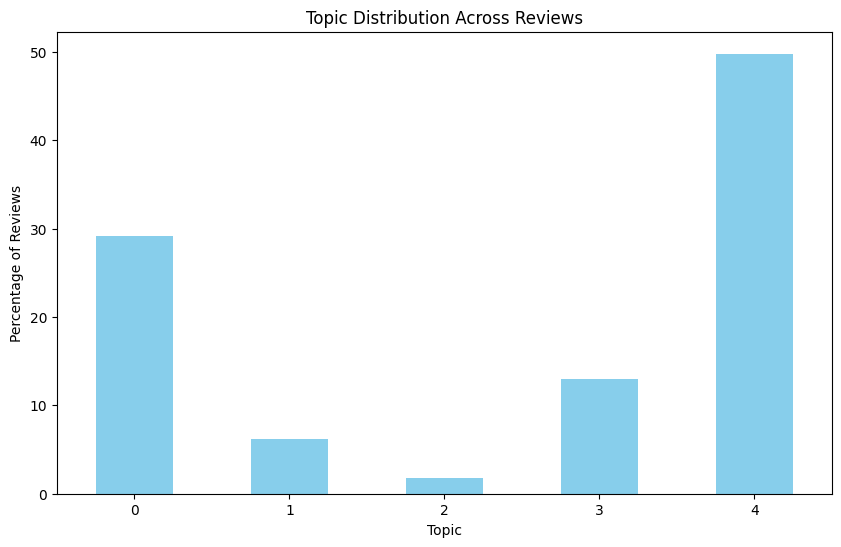

In [ ]:
import matplotlib.pyplot as plt

# Assign each review to its dominant topic
topic_results = lda.transform(tf)
df["Dominant_Topic"] = topic_results.argmax(axis=1)

# Calculate the percentage of reviews per topic
topic_distribution = df["Dominant_Topic"].value_counts(normalize=True) * 100

# Plot the topic distribution
plt.figure(figsize=(10, 6))
topic_distribution.sort_index().plot(kind="bar", color="skyblue")
plt.title("Topic Distribution Across Reviews")
plt.xlabel("Topic")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


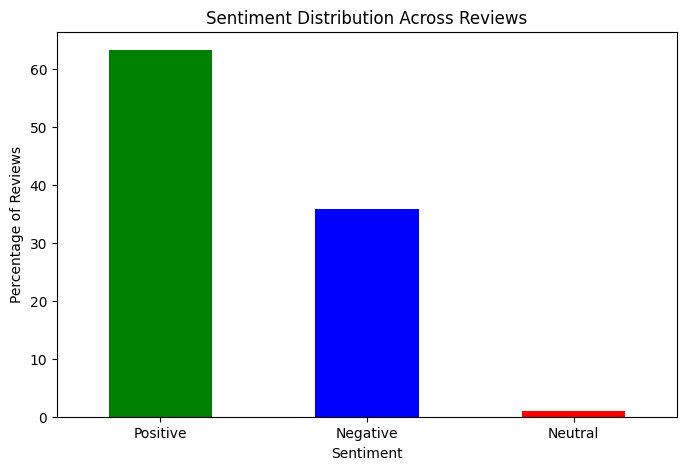

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
df["Sentiment"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, neutral, or negative
df["Sentiment_Label"] = df["Sentiment"].apply(
    lambda x: "Positive" if x > 0 else ("Neutral" if x == 0 else "Negative")
)

# Calculate the percentage of each sentiment
sentiment_distribution = df["Sentiment_Label"].value_counts(normalize=True) * 100

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind="bar", color=["green", "blue", "red"])
plt.title("Sentiment Distribution Across Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Extract top 10 words for each topic
key_topic_words = []
for idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    key_topic_words.extend(top_words)

# Remove duplicates (if any)
key_topic_words = list(set(key_topic_words))
print("Key Topic Words:", key_topic_words)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Key Topic Words: ['seats', 'staff', 'service', 'cancelled', 'passengers', 'customer', 'london', 'good', 'time', 'food', 'seat', 'luggage', 'ba', 'water', 'crew', 'flight', 'check', 'journey', 'airways', 'plane', 'hours', 'airline', 'cabin', 'business', 'british', 'class', 'told']


In [ ]:
from collections import Counter

# Combine all reviews into a single text
all_reviews = " ".join(df["Review"])

# Count the frequency of each key topic word
word_frequencies = Counter(all_reviews.split())
key_word_frequencies = {word: word_frequencies[word] for word in key_topic_words if word in word_frequencies}

# Sort by frequency
key_word_frequencies = dict(sorted(key_word_frequencies.items(), key=lambda x: x[1], reverse=True))

print("Key Topic Word Frequencies:", key_word_frequencies)

Key Topic Word Frequencies: {'flight': 2080, 'service': 752, 'crew': 621, 'seat': 593, 'time': 541, 'food': 527, 'cabin': 479, 'staff': 475, 'seats': 462, 'business': 451, 'good': 444, 'class': 422, 'hours': 394, 'told': 376, 'customer': 338, 'check': 318, 'plane': 284, 'airline': 278, 'passengers': 273, 'luggage': 205, 'cancelled': 187, 'water': 122, 'journey': 79, 'airways': 16, 'ba': 1}


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


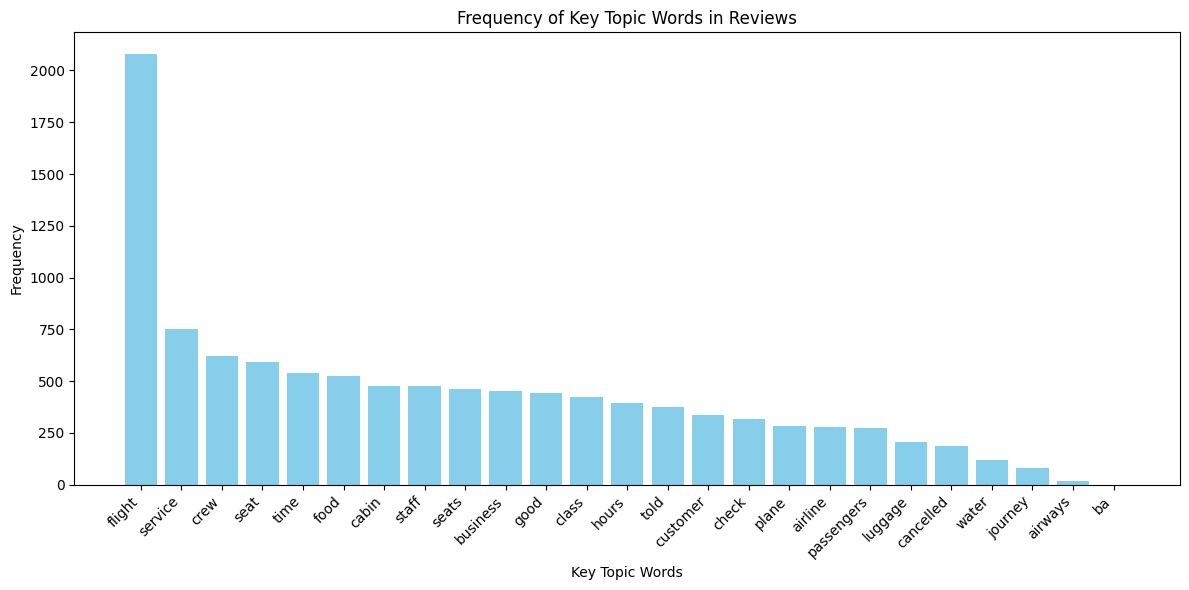

In [ ]:
import matplotlib.pyplot as plt

# Plot the frequency chart
plt.figure(figsize=(12, 6))
plt.bar(key_word_frequencies.keys(), key_word_frequencies.values(), color="skyblue")
plt.title("Frequency of Key Topic Words in Reviews")
plt.xlabel("Key Topic Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


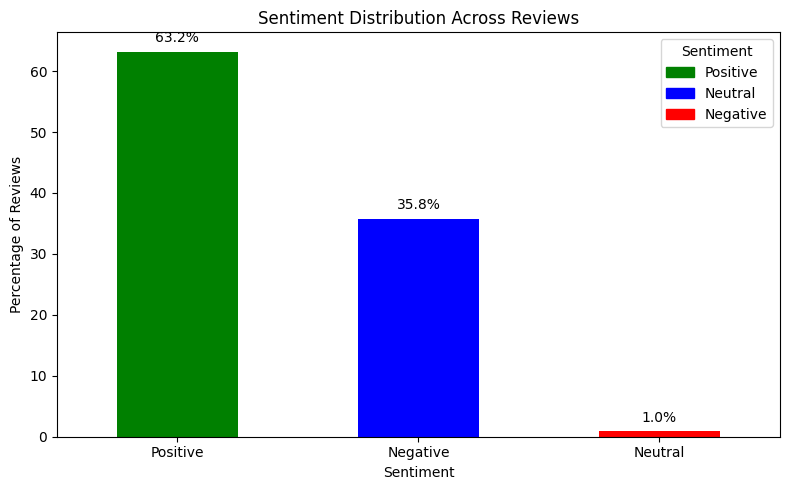

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Calculate sentiment polarity
df["Sentiment"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, neutral, or negative
df["Sentiment_Label"] = df["Sentiment"].apply(
    lambda x: "Positive" if x > 0 else ("Neutral" if x == 0 else "Negative")
)

# Calculate the percentage of each sentiment
sentiment_distribution = df["Sentiment_Label"].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(8, 5))
bars = sentiment_distribution.plot(kind="bar", color=["green", "blue", "red"])

# Add percentages on top of the bars
for idx, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height + 1,                         # Y position (slightly above the bar)
        f"{height:.1f}%",                   # Text (formatted to 1 decimal place)
        ha="center",                        # Horizontal alignment
        va="bottom",                        # Vertical alignment
        fontsize=10
    )

# Add legend
colors = {"Positive": "green", "Neutral": "blue", "Negative": "red"}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title="Sentiment")

# Format the plot
plt.title("Sentiment Distribution Across Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#this is another chapter where we built the predictive system using machine learning algorithm


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path = "/content/customer_booking.csv"

In [3]:
df = pd.read_csv(path, encoding= 'latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
print(df.isnull().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [8]:
categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [9]:
# Feature Engineering
# Example: Create a feature indicating if booking was made last minute
df['last_minute_booking'] = np.where(df['purchase_lead'] < 7, 1, 0)

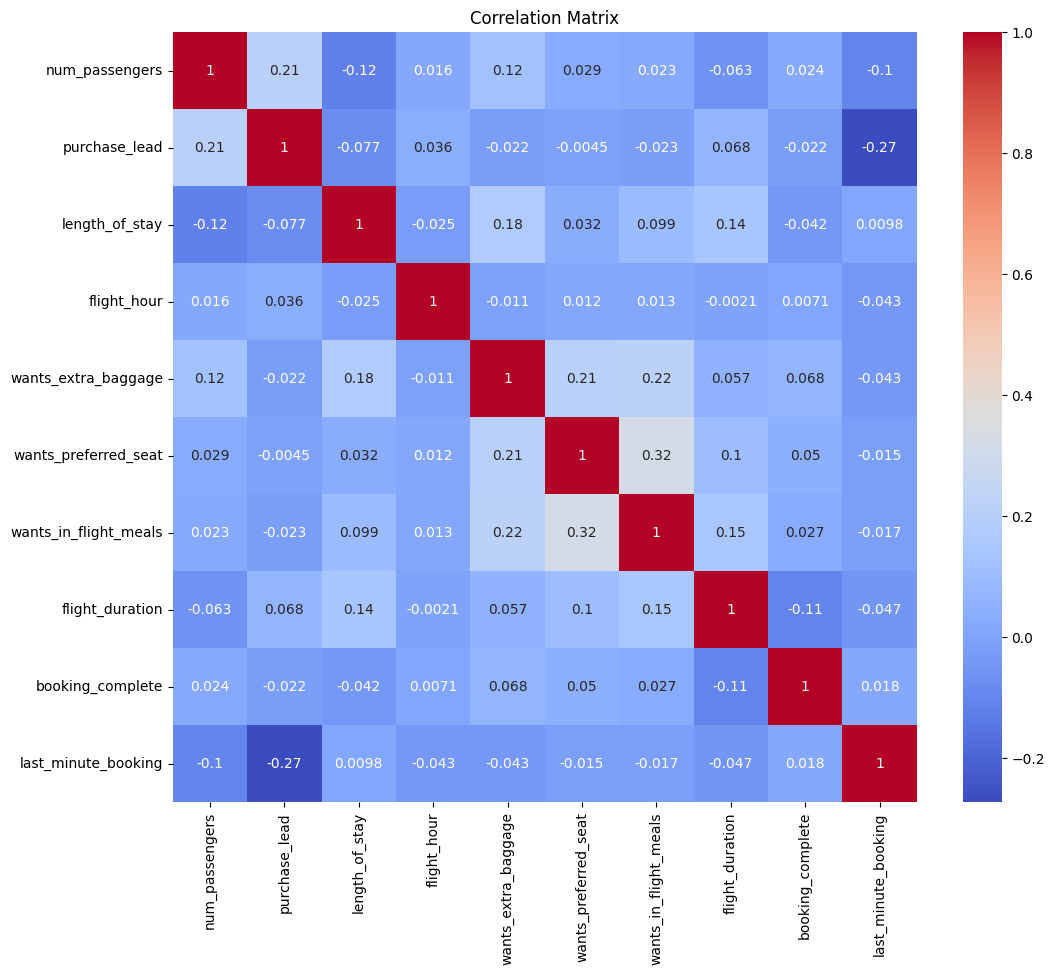

In [10]:
# Select only numeric columns before calculating correlation
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

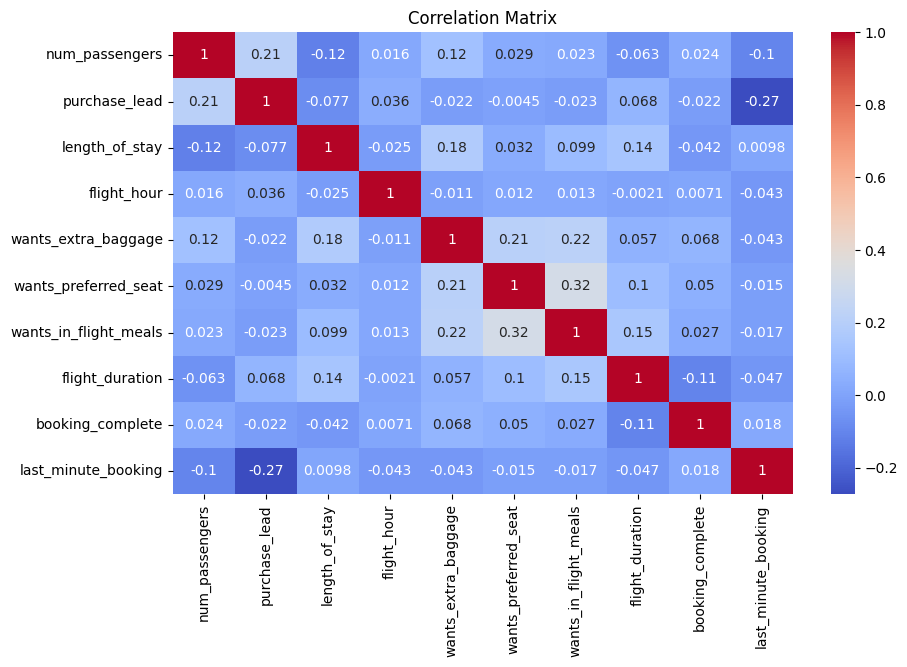

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [12]:
df1 = pd.read_csv(path, encoding= 'latin-1')
df1.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example: One-hot encode 'sales

# Get the top 10 most frequent routes
top_routes = df1['route'].value_counts().head(10).index.tolist()

# Get the top 10 most frequent countries
top_countries = df1['booking_origin'].value_counts().head(10).index.tolist()

# Now apply the lambda function
df1["route"] = df1["route"].apply(lambda x: x if x in top_routes else "Other")
df1["booking_origin"] = df1["booking_origin"].apply(lambda x: x if x in top_countries else "Other")

# Encode reduced categories
label_encoders = {}
for col in ["route", "booking_origin"]:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

In [14]:
# Create new features
df1["last_minute_booking"] = df1["purchase_lead"].apply(lambda x: 1 if x <= 7 else 0)
df1["flight_time_category"] = pd.cut(df1["flight_hour"], bins=[0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])
df1 = pd.get_dummies(df1, columns=["flight_time_category"], drop_first=True)

In [15]:
df1.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,last_minute_booking,flight_time_category_Morning,flight_time_category_Afternoon,flight_time_category_Evening
0,2,Internet,RoundTrip,262,19,7,Sat,9,6,1,0,0,5.52,0,0,True,False,False
1,1,Internet,RoundTrip,112,20,3,Sat,9,6,0,0,0,5.52,0,0,False,False,False
2,2,Internet,RoundTrip,243,22,17,Wed,9,2,1,1,0,5.52,0,0,False,True,False
3,1,Internet,RoundTrip,96,31,4,Sat,9,6,0,0,1,5.52,0,0,False,False,False
4,2,Internet,RoundTrip,68,22,15,Wed,9,2,1,0,1,5.52,0,0,False,True,False


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
# One-hot encode categorical columns
df1 = pd.get_dummies(
    df1,
    columns=["sales_channel", "trip_type", "flight_day", "route", "booking_origin"],
    drop_first=True
)

# Verify no string columns remain
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   num_passengers                  50000 non-null  int64  
 1   purchase_lead                   50000 non-null  int64  
 2   length_of_stay                  50000 non-null  int64  
 3   flight_hour                     50000 non-null  int64  
 4   wants_extra_baggage             50000 non-null  int64  
 5   wants_preferred_seat            50000 non-null  int64  
 6   wants_in_flight_meals           50000 non-null  int64  
 7   flight_duration                 50000 non-null  float64
 8   booking_complete                50000 non-null  int64  
 9   last_minute_booking             50000 non-null  int64  
 10  flight_time_category_Morning    50000 non-null  bool   
 11  flight_time_category_Afternoon  50000 non-null  bool   
 12  flight_time_category_Evening    

In [19]:
# Convert boolean columns to integers (0/1)
bool_cols = df1.select_dtypes(include="bool").columns
df1[bool_cols] = df1[bool_cols].astype(int)

In [20]:
# Check target variable distribution
print(df1["booking_complete"].value_counts(normalize=True))

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model with balanced class weights
rf = RandomForestClassifier(
    class_weight="balanced",  # Adjusts weights to handle imbalance
    random_state=42,
    n_jobs=-1  # Parallelize training
)

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Maintain class balance
    random_state=42
)

In [25]:
# One-hot encode 'flight_day' column:
df = pd.get_dummies(df, columns=['flight_day'], drop_first=True)

# Then proceed with train-test split and model training:
from sklearn.model_selection import train_test_split

X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Maintain class balance
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)  # No more ValueError!

RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
from sklearn.metrics import classification_report, roc_auc_score # Import roc_auc_score

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.52      0.11      0.18      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000

ROC-AUC: 0.7898778995477436


In [29]:
!pip install imblearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Split the data
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8504
           1       0.42      0.19      0.26      1496

    accuracy                           0.84     10000
   macro avg       0.65      0.57      0.59     10000
weighted avg       0.80      0.84      0.81     10000

ROC-AUC: 0.780333751402297


In [30]:
smote = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42)
# sampling_strategy=0.5 aims for a 1:2 ratio between minority and majority class
# k_neighbors=5 controls the number of neighbors considered for creating synthetic samples

In [31]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [32]:
# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8504
           1       0.44      0.20      0.28      1496

    accuracy                           0.84     10000
   macro avg       0.66      0.58      0.59     10000
weighted avg       0.81      0.84      0.82     10000

ROC-AUC: 0.7773370096991161


In [33]:
!pip install imbalanced-learn

In [34]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

# Split data
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [35]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(
    estimator=base_estimator,
    n_estimators=100,  # Number of bootstrap subsets
    sampling_strategy='auto',  # Balances classes in each subset
    random_state=42,
    n_jobs=-1  # Parallelize training
)

# Train the model
bbc.fit(X_train, y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                          n_estimators=100, n_jobs=-1, random_state=42)

In [36]:
from sklearn.metrics import classification_report, roc_auc_score

# Predictions
y_pred = bbc.predict(X_test)
y_proba = bbc.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84      8504
           1       0.33      0.67      0.44      1496

    accuracy                           0.75     10000
   macro avg       0.63      0.72      0.64     10000
weighted avg       0.84      0.75      0.78     10000

ROC-AUC Score: 0.7913980240817785


In [40]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# ... (your other code, including ADASYN and model training) ...

# Make predictions
y_pred = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8419
Precision: 0.43884892086330934
Recall: 0.2038770053475936

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8504
           1       0.44      0.20      0.28      1496

    accuracy                           0.84     10000
   macro avg       0.66      0.58      0.59     10000
weighted avg       0.81      0.84      0.82     10000



<ipython-input-39-39af6a253aa7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


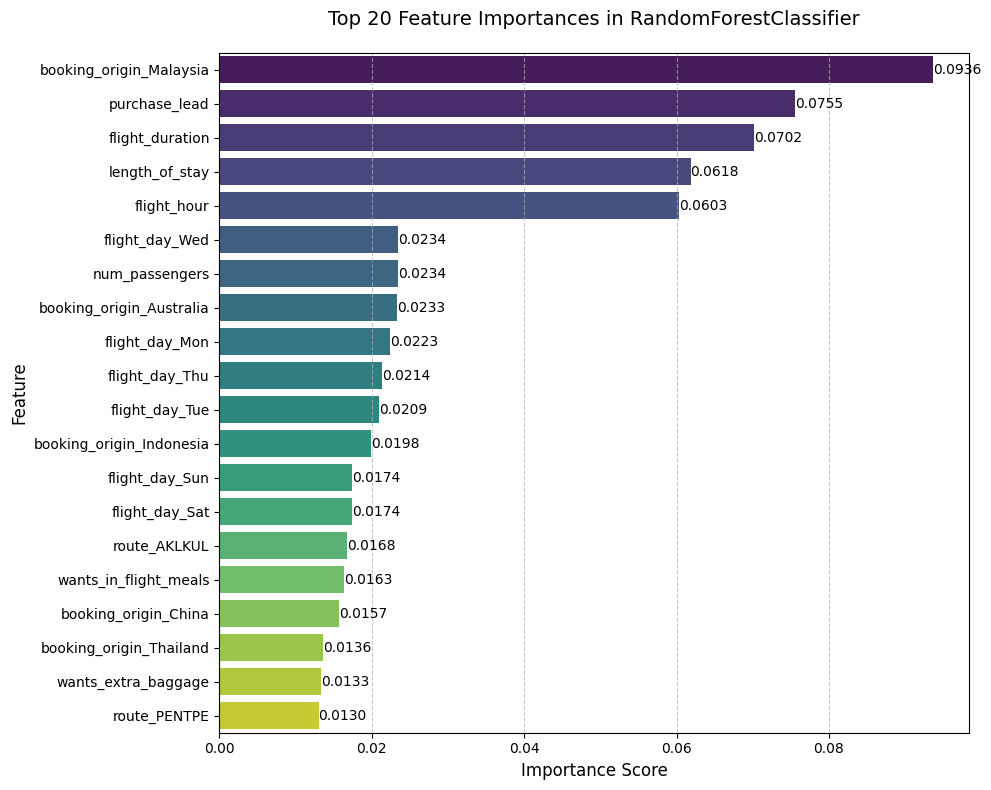

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_

# Create a dataframe for feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Limit to top 20 features for better readability
top_n = 20
feature_importances = feature_importances.head(top_n)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')

# Add labels and formatting
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title(f'Top {top_n} Feature Importances in RandomForestClassifier', fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add importance values on the bars
for index, value in enumerate(feature_importances['importance']):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()